C:\Users\mbseb\AppData\Local\Temp\ipykernel_21424\2236553693.py:5: DtypeWarning: Columns (30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('csvFiles/final_tweets_corrected_2024.csv')


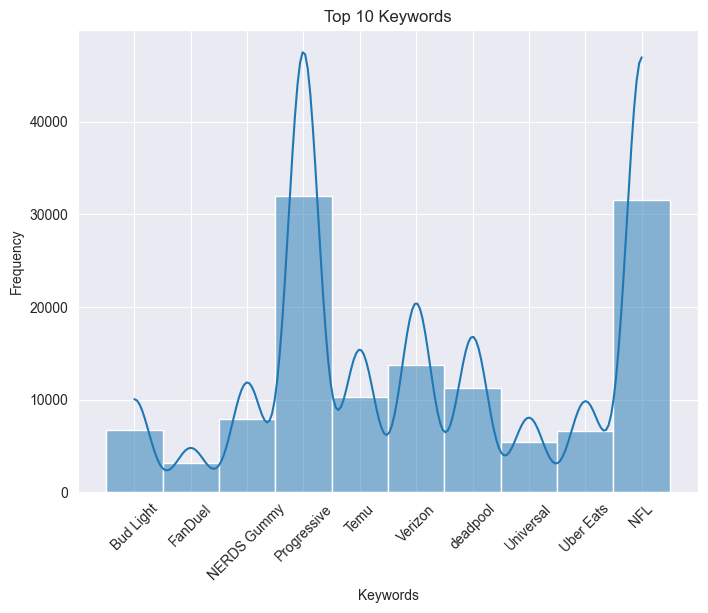

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('csvFiles/final_tweets_corrected_2024.csv')
df.head()

df = df.filter( items = ['keyword', 'text'])
df.head()

keyword_counts = df['keyword'].value_counts()

top_keywords = keyword_counts.head(10).index

df_top_keywords = df[df['keyword'].isin(top_keywords)]

plt.figure(figsize= (8,6))
sb.histplot(df_top_keywords['keyword'], bins = 10, kde = True)
plt.title('Top 10 Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()


C:\Users\mbseb\AppData\Local\Temp\ipykernel_21424\2743740246.py:2: DtypeWarning: Columns (30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('csvFiles/final_tweets_corrected_2024.csv').filter( items = ['keyword', 'public_metrics.impression_count'])


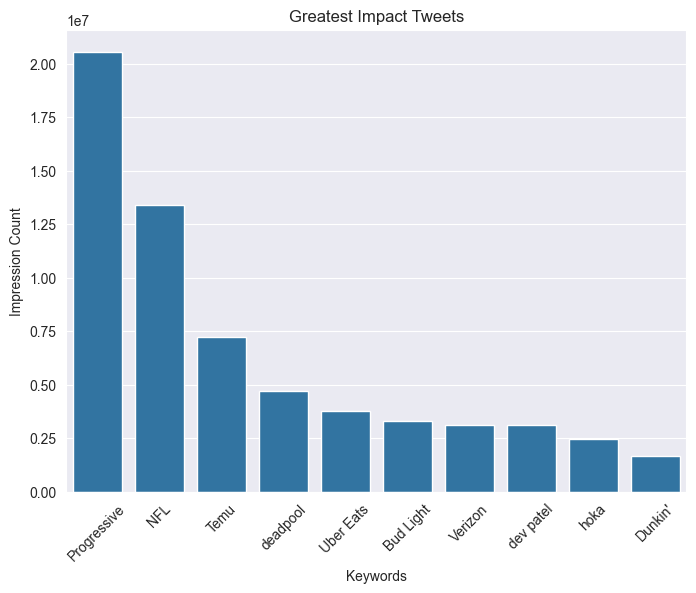

In [18]:
#Section for the greatest impact tweets
df = pd.read_csv('csvFiles/final_tweets_corrected_2024.csv').filter( items = ['keyword', 'public_metrics.impression_count'])

key_impression = {}
for keyword in df['keyword'].unique():
    key_impression[keyword] = 0
for(keyword, impression_count) in zip(df['keyword'], df['public_metrics.impression_count']):
    key_impression[keyword] += impression_count
    
top_impression = dict(sorted(key_impression.items(), key=lambda item: item[1], reverse=True)[:10])


plt.figure(figsize= (8,6))
sb.barplot(x = list(top_impression.keys()), y = list(top_impression.values()))
plt.title('Greatest Impact Tweets')
plt.xlabel('Keywords')
plt.ylabel('Impression Count')
plt.xticks(rotation = 45)
plt.show()
    

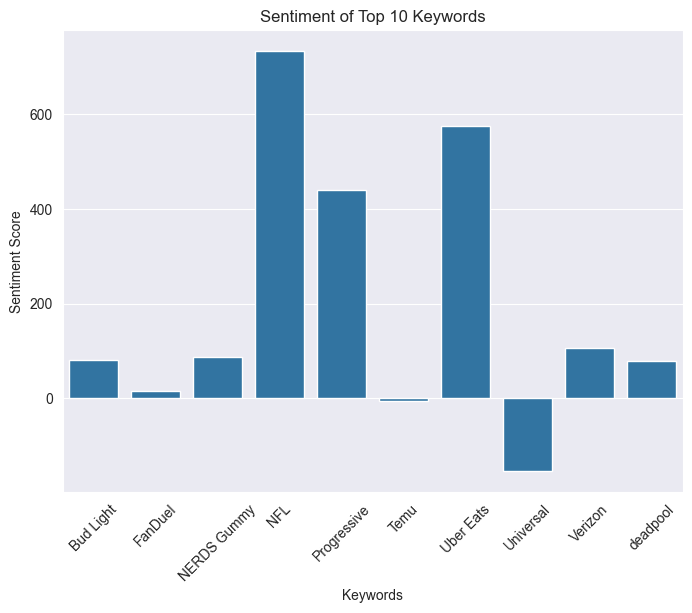

In [7]:
#Section for top 10 sentiment scores
# Assuming ss is your DataFrame that contains the sentiment scores for each keyword
ss = pd.read_csv('csvFiles/sentiment_scores.csv')

# Merge df_top_keywords with ss on the 'keyword' column
ss.rename(columns = {'Brand': 'keyword', 'Score': 'Score'}, inplace = True)
df_top_keywords = pd.merge(df_top_keywords, ss, on='keyword')

# Group by the 'keyword' column and calculate the mean sentiment score for each keyword
sentiment_of_top_keywords = df_top_keywords.groupby('keyword')['Score'].mean()

# Plot the sentiment of top keywords
plt.figure(figsize= (8,6))
sb.barplot(x=sentiment_of_top_keywords.index, y=sentiment_of_top_keywords.values)
plt.title('Sentiment of Top 10 Keywords')
plt.xlabel('Keywords')
plt.ylabel('Sentiment Score')
plt.xticks(rotation = 45)
plt.show()


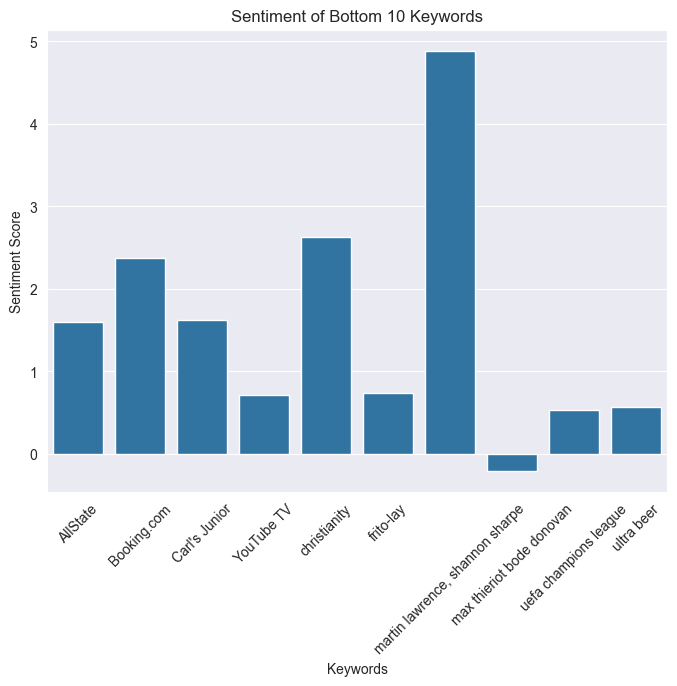

In [8]:
#Section for the lowest 10 sentiment scores
# Get the bottom 10 sentiment scores

bottom_keywords = keyword_counts.tail(10).index

df_bottom_keywords = df[df['keyword'].isin(bottom_keywords)]

ss.rename(columns = {'Brand': 'keyword', 'Score': 'Score'}, inplace = True)

df_bottom_keywords = pd.merge(df_bottom_keywords, ss, on='keyword')

sentiment_of_bottom_keywords = df_bottom_keywords.groupby('keyword')['Score'].mean()

# Plot the bottom 10 sentiment scores
plt.figure(figsize= (8,6))
sb.barplot(x=sentiment_of_bottom_keywords.index, y=sentiment_of_bottom_keywords.values)
plt.title('Sentiment of Bottom 10 Keywords')
plt.xlabel('Keywords')
plt.ylabel('Sentiment Score')
plt.xticks(rotation = 45)
plt.show()

ss.rename(columns = {'keyword': 'Brand', 'Score': 'Score'}, inplace = True)

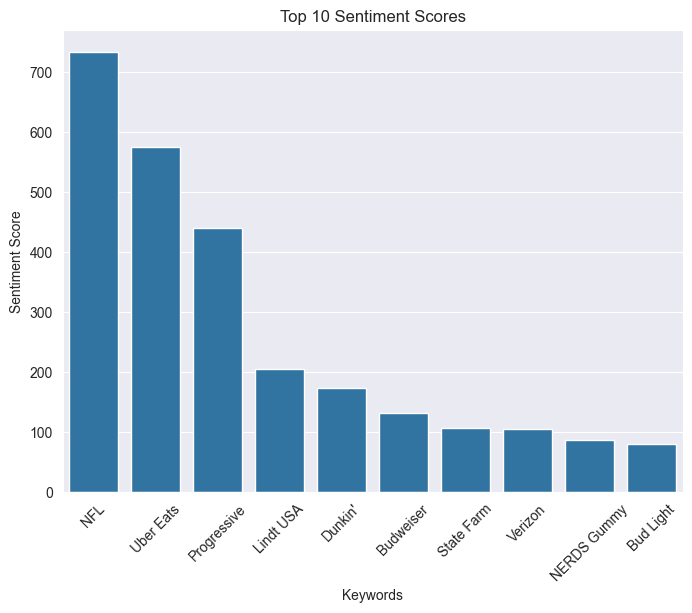

In [9]:
#Section for the top-rated sentiment scores

ss = pd.read_csv('csvFiles/sentiment_scores.csv')

# Get the top 10 sentiment scores
ss.sort_values(by='Score', ascending=False, inplace=True)
top_sentiment_scores = ss.head(10).set_index('Brand')['Score']

# Plot the top 10 sentiment scores
plt.figure(figsize= (8,6))
sb.barplot(x=top_sentiment_scores.index, y=top_sentiment_scores.values)
plt.title('Top 10 Sentiment Scores')
plt.xlabel('Keywords')
plt.ylabel('Sentiment Score')
plt.xticks(rotation = 45)
plt.show()

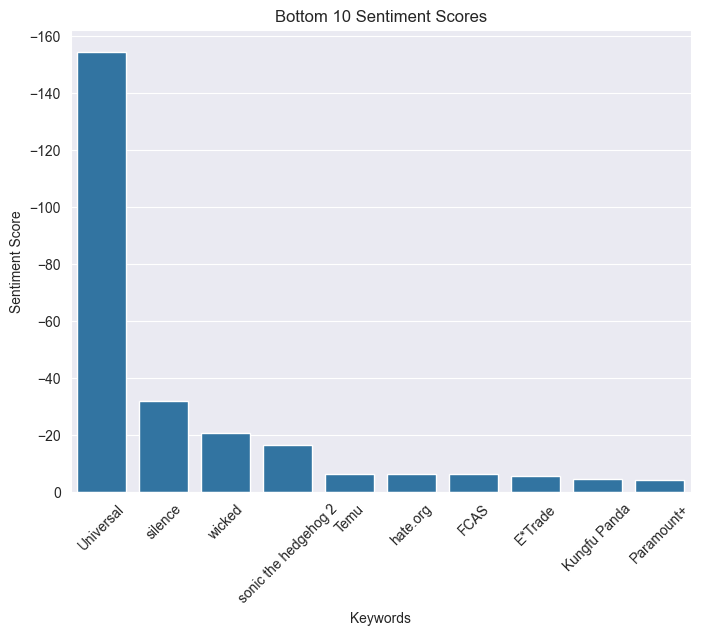

In [10]:
#Section for the lowest rated sentiment scores

ss = pd.read_csv('csvFiles/sentiment_scores.csv')

ss.sort_values(by='Score', inplace=True)

bottom_sentiment_scores = ss.head(10).set_index('Brand')['Score']

# Plot the bottom 10 sentiment scores
plt.figure(figsize= (8,6))
sb.barplot(x=bottom_sentiment_scores.index, y=bottom_sentiment_scores.values)
plt.title('Bottom 10 Sentiment Scores')
plt.xlabel('Keywords')
plt.ylabel('Sentiment Score')
plt.xticks(rotation = 45)
plt.gca().invert_yaxis()
plt.show()


In [11]:
ss = pd.read_csv('csvFiles/sentiment_scores.csv')
ss.head()

,Brand,Score
0,Universal,-154.3871
1,Oreo,62.0447
2,Temu,-6.3766
3,morgan stanley,23.0332
4,Progressive,440.9466


In [12]:
#Section for collecting quarterly tweet counts
df = pd.read_csv('csvFiles/final_tweets_corrected_2024.csv')
qtr = pd.read_csv('csvFiles/Quarter and Brand Result.csv')

counts = df['keyword'].value_counts()

link_counts = list(zip(qtr['brandname'], qtr['quarter']))
qtr_value = {'quarter 1': 0, 'quarter 2': 0, 'quarter 3': 0, 'quarter 4': 0, 'halftime': 0, 'overtime': 0}
q1_brand, q2_brand, q3_brand, q4_brand, half_brand, ot_brand = [], [], [], [], [], []
for brand, quarter in link_counts:
    
    if quarter == 'quarter 1':
        qtr_value['quarter 1'] += counts.get(brand, 0)
        q1_brand.append(brand)
        
    elif quarter == 'quarter 2':
         qtr_value['quarter 2'] += counts.get(brand, 0)
         q2_brand.append(brand)
         
    elif quarter == 'quarter 3':
         qtr_value['quarter 3'] += counts.get(brand, 0)
         q3_brand.append(brand)
         
    elif quarter == 'quarter 4':
         qtr_value['quarter 4'] += counts.get(brand, 0)
         q4_brand.append(brand)
         
    elif quarter == 'halftime':
         qtr_value['halftime'] += counts.get(brand, 0)
         half_brand.append(brand)
         
    elif quarter == 'overtime':
         qtr_value['overtime'] += counts.get(brand, 0)
         ot_brand.append(brand)
         
    else:
         print('Error')
     
for qtrs in qtr_value:
    print(qtr_value[qtrs])

C:\Users\mbseb\AppData\Local\Temp\ipykernel_21424\2819711466.py:2: DtypeWarning: Columns (30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('csvFiles/final_tweets_corrected_2024.csv')


23365
35268
32137
39093
40553
2244


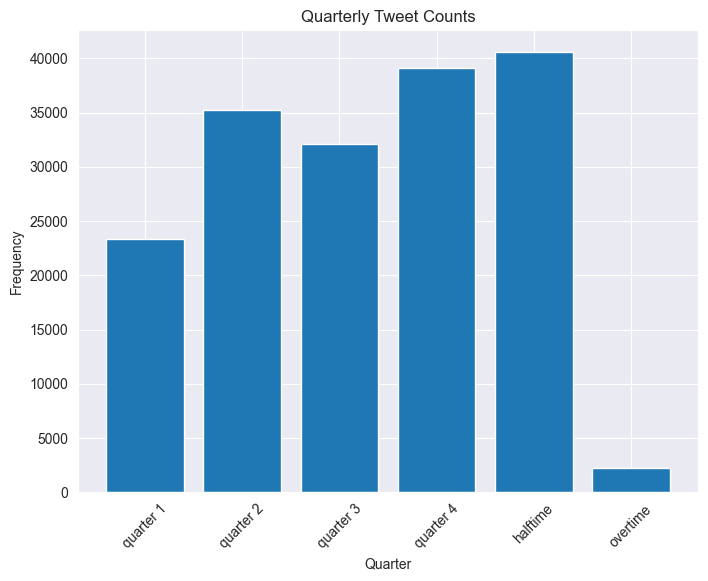

In [13]:
#Section for plotting the quarterly tweet counts

plt.figure(figsize= (8,6))
plt.bar(qtr_value.keys(), qtr_value.values())
plt.title('Quarterly Tweet Counts')
plt.xlabel('Quarter')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

Error
Error
Error
418.0968999999996
755.8902999999999
987.4161999999997
688.6382999999971
1020.7931999999937
51.148800000000016


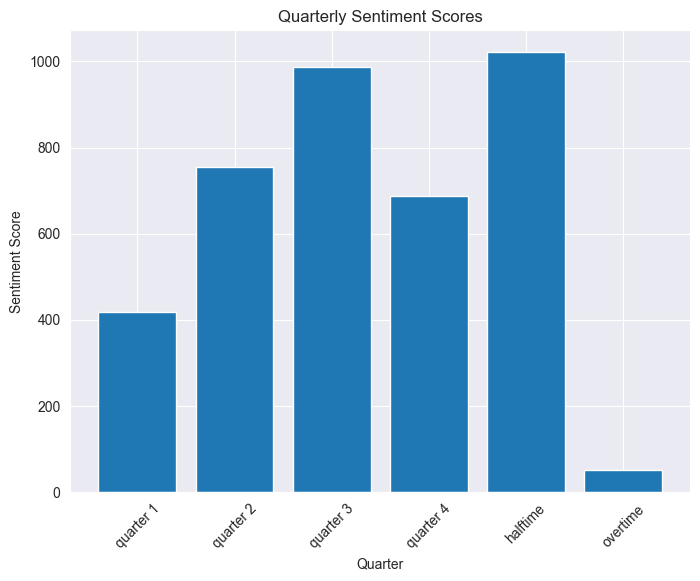

In [14]:
#Section to compare sentiment score by quarter

ss = pd.read_csv('csvFiles/sentiment_scores.csv')
brand_sent_link = list(zip(ss['Brand'], ss['Score']))

qbr = pd.read_csv('csvFiles/Quarter and Brand Result.csv')

for brand in qtr_value:
    qtr_value[brand] = 0

for brand, score in brand_sent_link:
    if brand in q1_brand:
        qtr_value['quarter 1'] += score

    elif brand in q2_brand:
        qtr_value['quarter 2'] += score

    elif brand in q3_brand:
        qtr_value['quarter 3'] += score

    elif brand in q4_brand:
        qtr_value['quarter 4'] += score

    elif brand in half_brand:
        qtr_value['halftime'] += score

    elif brand in ot_brand:
        qtr_value['overtime'] += score

    else:
        print('Error')

for qtrs in qtr_value:
    print(qtr_value[qtrs])

plt.figure(figsize=(8, 6))
plt.bar(qtr_value.keys(), qtr_value.values())
plt.title('Quarterly Sentiment Scores')
plt.xlabel('Quarter')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


In [15]:
#section for appending the sentiment scores with tweet-less brands
import csv

ss = pd.read_csv('csvFiles/sentiment_scores.csv').filter(items = ['Brand'])
qbr = pd.read_csv('csvFiles/Quarter and Brand Result.csv').filter(items = ['brandname'])

unique_brands = set()  

for brand in qbr['brandname']:
    unique_brands.add(brand)
    
for brand in ss['Brand']:
    if brand in unique_brands:
        unique_brands.remove(brand)
        
with open('csvFiles/sentiment_scores.csv', 'a', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for brand in unique_brands:
            writer.writerow([brand, 0])
